In [ ]:
!pip install tensorflow-tpu


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
#import some basics libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset=pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide dataset into independent and dependent feature
X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
#Feature enginerring
geography=pd.get_dummies(X['Geography'] ,drop_first=True)
# geography
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
###drop and concatenate these variables(Categorical) with dataframe
X=X.drop(['Geography','Gender'],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)



In [ ]:
X_train.shape

(8000, 11)

In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
## Part 2:
## Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout#regularization


In [ ]:
##Lets initialize the ANN
classifier=Sequential()

In [ ]:
## Adding the input layers
classifier.add(Dense(units=11))

In [ ]:
## Adding the 1'st hidden layers
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

## Adding the 2'nd hidden layers
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

## Adding the output layers
classifier.add(Dense(1,activation='sigmoid'))


In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.4352 - accuracy: 0.8059 - val_loss: 0.4054 - val_accuracy: 0.8360
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3697 - accuracy: 0.8459 - val_loss: 0.3936 - val_accuracy: 0.8277
Epoch 3/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3545 - accuracy: 0.8554 - val_loss: 0.3689 - val_accuracy: 0.8478
Epoch 4/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3503 - accuracy: 0.8552 - val_loss: 0.3694 - val_accuracy: 0.8504
Epoch 5/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.3483 - accuracy: 0.8599 - val_loss: 0.3787 - val_accuracy: 0.8501
Epoch 6/1000
536/536 [==============================] - 6s 11ms/step - loss: 0.3477 - accuracy: 0.8582 - val_loss: 0.3629 - val_accuracy: 0.8519
Epoch 7/1000
536/536 [==============================] - 7s 13ms/step - loss: 0.3450 - accuracy: 0.8604 - val_loss: 0.3786 - val_accurac

In [ ]:
model_history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

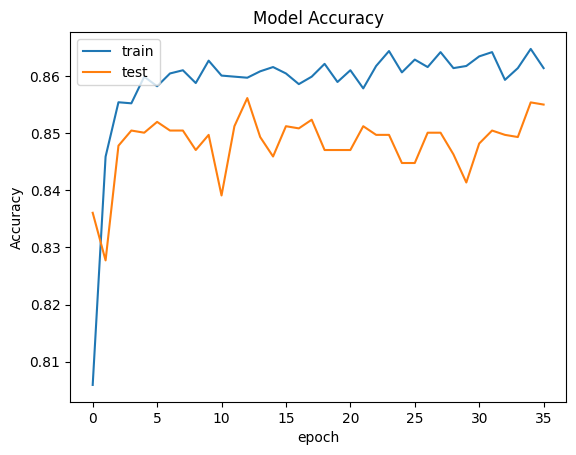

In [ ]:
#summarize the histroy accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

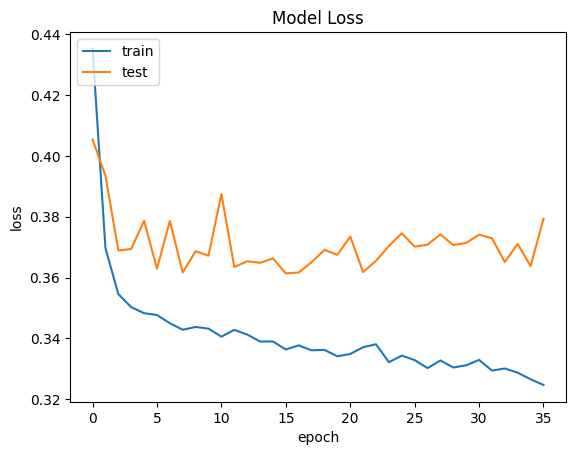

In [ ]:
#summarize for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [ ]:
#Part 3 - Making the predictions and evaluating the model

#Predicting the test datasets results

Y_pred=classifier.predict(X_test)
Y_pred=(Y_pred >= 0.5)



63/63 [==============================] - 0s 4ms/step


In [ ]:
Y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[1497   98]
 [ 173  232]]


In [ ]:
#Calculate the accuracy score
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_pred,Y_test)
score

0.8645

In [ ]:
##gets the weights

classifier.get_weights()

[array([[ 1.20647706e-01, -1.47030103e+00,  2.37924218e+00,
          1.46131545e-01,  6.72868937e-02,  8.51311386e-02,
          1.90446824e-01,  7.47598469e-01, -2.49957554e-02,
         -1.54918909e-01, -7.37123266e-02],
        [ 2.56563902e-01,  1.23708785e+00,  1.71479180e-01,
         -1.98785710e+00, -2.87573695e+00, -1.59810400e+00,
         -1.91887438e+00,  3.34298015e-01,  1.16481435e+00,
          7.42220700e-01, -1.69173315e-01],
        [ 1.97027728e-01, -1.70920968e+00,  1.15894705e-01,
         -2.66936302e-01,  1.23180337e-01,  1.09800446e+00,
         -8.93872261e-01,  7.66163543e-02,  1.10964976e-01,
          3.78221303e-01, -4.51242924e-02],
        [-1.92374480e+00,  7.18216777e-01, -1.21452510e+00,
         -3.46989483e-01,  3.68882775e-01, -2.49174809e+00,
         -8.46431851e-01,  2.72353864e+00, -1.32675350e+00,
         -2.97598791e+00,  1.30070597e-01],
        [-2.38546205e+00, -6.51066720e-01,  7.79195249e-01,
          2.40735412e-01,  5.39104760e-01,  